# 1. Data Loading

In [75]:
import torch

In [76]:
import pandas as pd
import os

In [77]:
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [78]:
os.listdir('./data')

['customers.csv',
 '.DS_Store',
 'two_tower_checkpoint_1_Feb_A.pth',
 'images',
 'submission-Feb-2-C.csv',
 'articles.csv',
 'customer_embeddings.npz',
 'transactions_train.csv',
 'article_embeddings.npz',
 'full_training_labels.csv',
 'sample_submission.csv']

In [79]:
customers = pd.read_csv("./data/customers.csv")

In [80]:
articles = pd.read_csv("./data/articles.csv")

In [81]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [82]:
transactions[-1250000:-250000]

,t_dat,customer_id,article_id,price,sales_channel_id
30538324,2020-08-20,56dddef3f3c852b3f70325a94f80b319144687a9e9631e...,924453003,0.025407,2
30538325,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,902161006,0.027119,1
30538326,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,752689003,0.013542,1
30538327,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,806388001,0.010831,1
30538328,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,806388002,0.010831,1
...,...,...,...,...,...
31538319,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,902419001,0.050831,2
31538320,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,706016053,0.033881,2
31538321,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,764073004,0.042356,2
31538322,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,926921003,0.033881,2


In [83]:
import pandas as pd
transactions = pd.read_csv("./data/transactions_train.csv")

In [84]:
last_month_transcations = transactions[-1000000:]

In [85]:
customer_grouped = last_month_transcations.groupby('customer_id').size()

In [86]:
submission = pd.read_csv("./data/sample_submission.csv")

In [5]:
submission.prediction[0]

'0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001'

In [23]:
submission_users = set(list(submission['customer_id']))

In [24]:
transaction_users = set(list(transactions['customer_id']))

In [25]:
intersect_user = set()
for u in submission_users:
    if u in transaction_users:
        intersect_user.add(u)
    

In [28]:
last_month_transaction_users = set(list(last_month_transcations['customer_id']))

In [29]:
intersect_user = set()
for u in submission_users:
    if u in last_month_transaction_users:
        intersect_user.add(u)

In [30]:
len(intersect_user), len(submission_users), len(last_month_transaction_users)

(226120, 1371980, 226120)

In [34]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [35]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

# Train/Test Dataset Split

In [19]:
customer_grouped = last_month_transcations.groupby('customer_id').size()

In [20]:
customer_grouped

customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657     1
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318     1
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a     2
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75     6
0000b2f1829e23b24feec422ef13df3ccedaedc85368e6664d04ca30b2f8daff     4
                                                                    ..
fffd176916f8c790ad54335c0f8478e613b5cb9b09ce2ca87cf3c11fa4fe5fc6     2
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01     2
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b    15
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831     6
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264     4
Length: 226120, dtype: int64

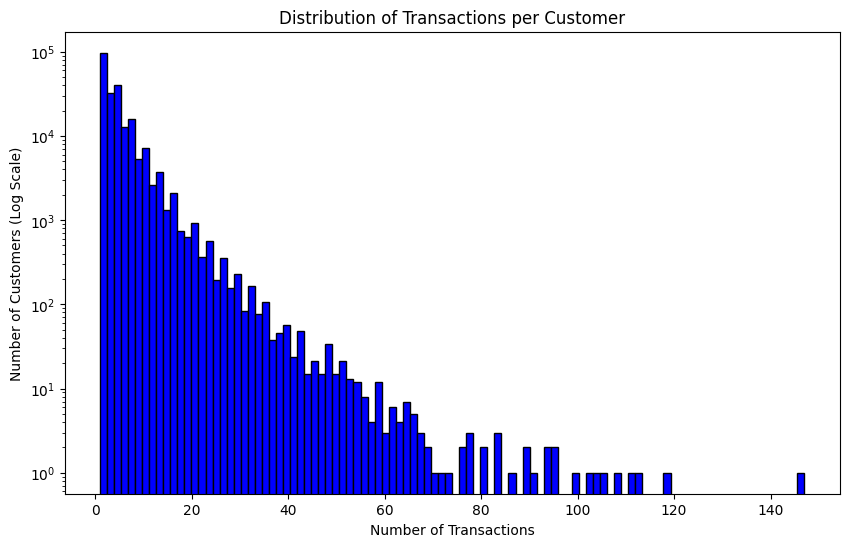

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(customer_grouped, bins=100, color='blue', edgecolor='black')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers (Log Scale)')
plt.title('Distribution of Transactions per Customer')
plt.show()


In [37]:
train = transactions[-1250000:-250000]

In [46]:
train_users = set(train.customer_id)

In [47]:
len(train_users)

225350

In [39]:
test = transactions[-250000:]

In [57]:
test.shape

(250000, 5)

In [48]:
test_users = set(test.customer_id)

In [44]:
len(test_users)

71443

In [49]:
intersect_user = set()
for u in train_users:
    if u in test_users:
        intersect_user.add(u)

In [50]:
len(intersect_user)

31222

In [53]:
train_users = train['customer_id'].unique()

In [55]:
test_filtered = test[test['customer_id'].isin(train_users)]

In [58]:
test_filtered.shape

(108462, 5)

In [60]:
test_filtered['customer_id'].unique().shape

(31222,)

In [62]:
# compute recall@100 and maybe recall@1000 within test_filtered dataset, for less than 31k users if that's too many
# create test and train dataset using function from below and data here
# code above avoid cold start problem, all users in test dataset have a embedding that was trained in train dataset

In [64]:
test_filtered.shape, test_filtered.columns

((108462, 5),
 Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object'))

# Articles Categorical

In [66]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [67]:
import pandas as pd

cols_to_encode = [col for col in articles.columns if col.endswith('_no')]

# Use pd.get_dummies to one-hot encode these columns
articles_encoded = pd.get_dummies(articles, columns=cols_to_encode, prefix=cols_to_encode)

print(articles_encoded.head())

   article_id  product_code          prod_name product_type_name  \
0   108775015        108775          Strap top          Vest top   
1   108775044        108775          Strap top          Vest top   
2   108775051        108775      Strap top (1)          Vest top   
3   110065001        110065  OP T-shirt (Idro)               Bra   
4   110065002        110065  OP T-shirt (Idro)               Bra   

   product_group_name graphical_appearance_name  colour_group_code  \
0  Garment Upper body                     Solid                  9   
1  Garment Upper body                     Solid                 10   
2  Garment Upper body                    Stripe                 11   
3           Underwear                     Solid                  9   
4           Underwear                     Solid                 10   

  colour_group_name  perceived_colour_value_id perceived_colour_value_name  \
0             Black                          4                        Dark   
1             

In [68]:
# Select columns that contain '_no' in their names
columns_with_no = [col for col in articles_encoded.columns if '_no' in col]

# Create a new DataFrame with only those columns
articles_categorical = articles_encoded[columns_with_no]

In [69]:
articles_categorical.index = articles_encoded['article_id']

# Users Categorical

In [73]:
cols_to_encode = ['Active', 'FN', 'club_member_status', 'fashion_news_frequency']

In [87]:
customers_encoded = pd.DataFrame()
mapping_dict = {}
for col in cols_to_encode:
    # 1. Find unique values
    unique_vals = customers[col].unique()
    
    # 2. Create a mapping dictionary (value -> integer code)
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    mapping_dict[col] = mapping
    print(f"Mapping for '{col}': {mapping}")
    
    # 3. Map the original column to integer codes
    code_col = col + '_code'
    customers[code_col] = customers[col].map(mapping)
    
    # 4. One-hot encode the integer codes
    dummies = pd.get_dummies(customers[code_col], prefix=col)
    
    # Concatenate the dummy variables back into the DataFrame
    customers_encoded = pd.concat([customers_encoded, dummies], axis=1)

print("\nDataFrame after one-hot encoding:")
print(customers_encoded)

Mapping for 'Active': {np.float64(nan): 0, np.float64(1.0): 1}
Mapping for 'FN': {np.float64(nan): 0, np.float64(1.0): 1}
Mapping for 'club_member_status': {'ACTIVE': 0, nan: 1, 'PRE-CREATE': 2, 'LEFT CLUB': 3}
Mapping for 'fashion_news_frequency': {'NONE': 0, 'Regularly': 1, nan: 2, 'Monthly': 3}

DataFrame after one-hot encoding:
         Active_0  Active_1   FN_0   FN_1  club_member_status_0  \
0            True     False   True  False                  True   
1            True     False   True  False                  True   
2            True     False   True  False                  True   
3            True     False   True  False                  True   
4           False      True  False   True                  True   
...           ...       ...    ...    ...                   ...   
1371975      True     False   True  False                  True   
1371976      True     False   True  False                  True   
1371977     False      True  False   True                  True

In [88]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3
0,True,False,True,False,True,False,False,False,True,False,False,False
1,True,False,True,False,True,False,False,False,True,False,False,False
2,True,False,True,False,True,False,False,False,True,False,False,False
3,True,False,True,False,True,False,False,False,True,False,False,False
4,False,True,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,True,False,True,False,True,False,False,False,True,False,False,False
1371976,True,False,True,False,True,False,False,False,True,False,False,False
1371977,False,True,False,True,True,False,False,False,False,True,False,False
1371978,False,True,False,True,True,False,False,False,False,True,False,False


In [89]:
customers.age /= 100

In [90]:
customers_encoded = pd.concat([customers_encoded, customers[['age']]], axis=1)

In [91]:
customers_encoded.index = customers['customer_id']

In [92]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,True,False,True,False,True,False,False,False,True,False,False,False,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,True,False,True,False,True,False,False,False,True,False,False,False,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,True,False,True,False,True,False,False,False,True,False,False,False,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,True,False,True,False,True,False,False,False,True,False,False,False,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,False,True,False,True,True,False,False,False,False,True,False,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,True,False,True,False,True,False,False,False,True,False,False,False,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,True,False,True,False,True,False,False,False,True,False,False,False,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,False,True,False,True,True,False,False,False,False,True,False,False,0.21


# Training Data Preparation

In [83]:

# Convert all boolean columns to floats in both DataFrames
for df in [customers_encoded, articles_categorical]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(float)

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_86458/1207431484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bool_cols] = df[bool_cols].astype(float)


In [93]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,True,False,True,False,True,False,False,False,True,False,False,False,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,True,False,True,False,True,False,False,False,True,False,False,False,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,True,False,True,False,True,False,False,False,True,False,False,False,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,True,False,True,False,True,False,False,False,True,False,False,False,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,False,True,False,True,True,False,False,False,False,True,False,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,True,False,True,False,True,False,False,False,True,False,False,False,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,True,False,True,False,True,False,False,False,True,False,False,False,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,False,True,False,True,True,False,False,False,False,True,False,False,0.21


In [94]:
articles_categorical

,product_type_no_-1,product_type_no_49,product_type_no_57,product_type_no_59,product_type_no_60,product_type_no_66,product_type_no_67,product_type_no_68,product_type_no_69,product_type_no_70,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108775044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108775051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110065001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
110065002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953450001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
953763001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
956217002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
train

,t_dat,customer_id,article_id,price,sales_channel_id
30538324,2020-08-20,56dddef3f3c852b3f70325a94f80b319144687a9e9631e...,924453003,0.025407,2
30538325,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,902161006,0.027119,1
30538326,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,752689003,0.013542,1
30538327,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,806388001,0.010831,1
30538328,2020-08-20,56e364814078c1f645d02abf6bc1f9802535d3eeed5a11...,806388002,0.010831,1
...,...,...,...,...,...
31538319,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,902419001,0.050831,2
31538320,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,706016053,0.033881,2
31538321,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,764073004,0.042356,2
31538322,2020-09-15,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,926921003,0.033881,2


In [95]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [104]:

def get_labels(dataset):
    positive_labels = dataset[['customer_id', 'article_id']]
    positive_labels['label'] = 1.0

    customer_positive = positive_labels.groupby('customer_id')['article_id'].apply(set)

    # Define the helper function that will sample a negative article for a row.
    def sample_negative_for_row(row):
        customer = row['customer_id']
        pos_set = customer_positive.get(customer, set())
        
        # Start by sampling a candidate from the entire articles list.
        candidate = np.random.choice(articles['article_id'])
        
        # Iterate until the candidate is not in the customer's positive set.
        while candidate in pos_set:
            candidate = np.random.choice(articles['article_id'])
        
        # Increment our counter and print progress every 1,000 rows.
        sample_negative_for_row.counter += 1
        if sample_negative_for_row.counter % 1000 == 0:
            print(f"Processed {sample_negative_for_row.counter} rows")
        
        return candidate
    
    # Initialize a counter attribute on the function.
    sample_negative_for_row.counter = 0
    
    print("\nStep 2: Generating negative samples for each positive interaction using .apply...")
    # For each row in positive_labels, sample a negative article that is not in the customer's positive set.
    positive_labels['negative_article'] = positive_labels.apply(sample_negative_for_row, axis=1)

    # Step 1: Create a new DataFrame for negative samples
    negative_labels = positive_labels[['customer_id', 'negative_article']].copy()
    negative_labels.rename(columns={'negative_article': 'article_id'}, inplace=True)
    negative_labels['label'] = 0.0
    
    # Step 2: Concatenate positive and negative labels into one DataFrame
    full_labels = pd.concat([positive_labels[['customer_id', 'article_id', 'label']], negative_labels], ignore_index=True)

    return full_labels
    


In [106]:
training_data_30d = full_labels

In [108]:
test_data_7d = get_labels(test)

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_79025/3114895148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_labels['label'] = 1.0



Step 2: Generating negative samples for each positive interaction using .apply...
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows
Processed 13000 rows
Processed 14000 rows
Processed 15000 rows
Processed 16000 rows
Processed 17000 rows
Processed 18000 rows
Processed 19000 rows
Processed 20000 rows
Processed 21000 rows
Processed 22000 rows
Processed 23000 rows
Processed 24000 rows
Processed 25000 rows
Processed 26000 rows
Processed 27000 rows
Processed 28000 rows
Processed 29000 rows
Processed 30000 rows
Processed 31000 rows
Processed 32000 rows
Processed 33000 rows
Processed 34000 rows
Processed 35000 rows
Processed 36000 rows
Processed 37000 rows
Processed 38000 rows
Processed 39000 rows
Processed 40000 rows
Processed 41000 rows
Processed 42000 rows
Processed 43000 rows
Processed 44000 rows
Pr

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_79025/3114895148.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_labels['negative_article'] = positive_labels.apply(sample_negative_for_row, axis=1)


In [109]:
test_data_7d

,customer_id,article_id,label
0,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,903420001,1.0
1,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,706016001,1.0
2,9f50ae6b4c28843c6b7215766edaadfee4a3870ee52793...,884345003,1.0
3,9f5274b80cb832dd8884e627ab6ab35738cb54fab4d21b...,852174001,1.0
4,9f536c659c3b9102106890f27c6dc2283afaa0f55fec1a...,902528006,1.0
...,...,...,...
499995,fff2282977442e327b45d8c89afde25617d00124d0f999...,714026008,0.0
499996,fff2282977442e327b45d8c89afde25617d00124d0f999...,612960001,0.0
499997,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,301656026,0.0
499998,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,917855001,0.0


In [111]:
def get_recall_test_data(dataset):
    """
    Given a transactions dataset with 'customer_id' and 'article_id',
    returns a DataFrame mapping each customer_id to a set of purchased article_ids.
    """
    # Group by customer and aggregate all article_ids into a set
    ground_truth_df = dataset.groupby('customer_id')['article_id'] \
                               .apply(set) \
                               .reset_index() \
                               .rename(columns={'article_id': 'bought_articles'})
    return ground_truth_df

test_data_7d_recall = get_recall_test_data(test)
print(test_data_7d_recall)


                                             customer_id  \
0      00039306476aaf41a07fed942884f16b30abfa83a2a8be...   
1      0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...   
2      000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...   
3      000525e3fe01600d717da8423643a8303390a055c578ed...   
4      00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...   
...                                                  ...   
71438  fffa67737587e52ff1afa9c7c6490b5eb7acbc439fe82b...   
71439  fffa7d7799eb390a76308454cbdd76e473d65b1497fbe4...   
71440  fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde...   
71441  fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...   
71442  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   

                                         bought_articles  
0                                            {624486001}  
1                                            {827487003}  
2                      {757926001, 640021019, 788575004}  
3                                          

In [112]:
test_data_7d_recall

,customer_id,bought_articles
0,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,{624486001}
1,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,{827487003}
2,000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...,"{757926001, 640021019, 788575004}"
3,000525e3fe01600d717da8423643a8303390a055c578ed...,{874110016}
4,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,"{158340001, 935892001, 799365027, 918171001, 9..."
...,...,...
71438,fffa67737587e52ff1afa9c7c6490b5eb7acbc439fe82b...,"{874816003, 911870004}"
71439,fffa7d7799eb390a76308454cbdd76e473d65b1497fbe4...,"{849886010, 861803014}"
71440,fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde...,"{918200001, 797892001, 894320003, 817472003, 8..."
71441,fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd...,"{761269001, 750423010}"


In [118]:
full_labels.to_csv("./data/full_training_labels.csv")

In [116]:
def add_features(dataset):
    dataset = dataset.merge(customers_encoded, on="customer_id", how="left")
    dataset = dataset.merge(articles_categorical, on="article_id", how="left")
    dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
    return dataset


In [117]:
training_data_30d = add_features(training_data_30d)

In [118]:
training_data_30d

,customer_id,article_id,label,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
0,cee7af10774bfa96cd5046219541514a51448c9b70d2e0...,733739006,0.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,d8c54f5ca6421ba8c5d7631ebdf7a5b67ccf2dce4b859c...,709991001,0.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,b7d0d84139ed0b809b92431be6cb076ec68cd6785c7b5d...,927922001,1.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9fbbca87a18c7f601868a6335951d8357d554aa2c6348a...,657367001,0.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,9facc7e5247374694a2cffe333d373abcb00545564326c...,863646003,1.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2550a466cf041c980e025ee86a5885b1aaf6ac0b6b9301...,804996002,1.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1999996,062a60d049a44377af6ef1e08056e2d7c542cc098c83be...,589544003,0.0,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1999997,2229947b2da9f29035ad3e2731219a8060e925c834b8cd...,862105013,1.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1999998,bf138853609d6516a42e9e998964f194bc2c28ab7cf44f...,886669001,1.0,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [119]:
test_data_7d =  add_features(test_data_7d)

In [120]:
test_data_7d

,customer_id,article_id,label,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
0,ad2bf29ada903355cd2c87c06cd7acce2815f2d3329132...,924243001,1.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7446c70dfc8237617e3dc12ceb45125eab33311fadca9d...,759465001,1.0,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,a21a7f49c1ef884da3136a67a25bd52dd1c38a95f300a8...,568808001,1.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6f9e5ca1edc634e5439ec81bce9248e48537a762b2df27...,785515002,1.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2aca5b66398de008890e42099e5d15fa77f98a530bb57b...,591466019,0.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,fa5ce8f2c928777fb522b157d8b7c81ec91a06727dad27...,739300001,0.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
499996,f9ca85f58c5a6a91ab85ce30f281b9be269bb86065e9dc...,851340001,0.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
499997,6a2c9e10247cf43cfd32374d3e0989449d87caf8e147ba...,869379001,1.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
499998,d048a289084bae40bcebeacfd1cb88d55e21b22d54b8af...,892937002,1.0,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False


# TTSN model

In [144]:
customers_encoded.columns, len(customers_encoded.columns)

(Index(['Active_0', 'Active_1', 'FN_0', 'FN_1', 'club_member_status_0',
        'club_member_status_1', 'club_member_status_2', 'club_member_status_3',
        'fashion_news_frequency_0', 'fashion_news_frequency_1',
        'fashion_news_frequency_2', 'fashion_news_frequency_3', 'age'],
       dtype='object'),
 13)

In [145]:
articles_categorical.columns, len(articles_categorical.columns)

(Index(['product_type_no_-1', 'product_type_no_49', 'product_type_no_57',
        'product_type_no_59', 'product_type_no_60', 'product_type_no_66',
        'product_type_no_67', 'product_type_no_68', 'product_type_no_69',
        'product_type_no_70',
        ...
        'garment_group_no_1013', 'garment_group_no_1014',
        'garment_group_no_1016', 'garment_group_no_1017',
        'garment_group_no_1018', 'garment_group_no_1019',
        'garment_group_no_1020', 'garment_group_no_1021',
        'garment_group_no_1023', 'garment_group_no_1025'],
       dtype='object', length=544),
 544)

In [155]:
training_data

,customer_id,article_id,label,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
0,557716a29afd925a80a972134bf6f63fb24943ed1cd33e...,786743001,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0593e4164603ee9830dc1ed4a7a3cfd5abecaf4424ddc...,615141002,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b303d0055cc805086fa0022a6c61cb0e61a24376c14a6c...,666735001,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f1f74b264240aa024a924a0edffd61908df2825b84f3c1...,911301001,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5d187c87e7dc44bc4c4e701da03147773a937c6db7eaa5...,685811005,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63572,34a06771f1dce07e64e1f060ae2da8c8e8c1195e92f302...,784205017,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63573,8152391b87fb0ab57067313fa8f8caf93209fd4b1c58b9...,766785003,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63574,207968eccc78b3baf8fe11908919ae4ff33085758d4c6c...,745232001,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63575,3fa0c831468d26d0f479fb0d5dc7540877713d80c97293...,399136061,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
import torch
from torch.utils.data import Dataset, DataLoader

class RecommendationDataset(Dataset):
    def __init__(self, customer_features, article_features, labels):
        """
        Args:
            customer_features (Tensor): shape [num_samples, 13]
            article_features (Tensor): shape [num_samples, 500]
            labels (Tensor): shape [num_samples] (e.g., implicit or explicit feedback)
        """
        self.customer_features = customer_features
        self.article_features = article_features
        self.labels = labels

    def __len__(self):
        return len(self.customer_features)

    def __getitem__(self, idx):
        return (self.customer_features.iloc[idx].values,
                self.article_features.iloc[idx].values,
                self.labels.iloc[idx].values)

def customer_training_data_preparation(customers_encoded):
    return customers_encoded.astype('float32').fillna(0.0)

def article_training_data_preparation(articles_categorical):
    return articles_categorical.astype('float32').fillna(0.0)


def get_data_loader(table):
    # Create the dataset and then a DataLoader
    dataset = RecommendationDataset(
        customer_training_data_preparation(table[customers_encoded.columns]).reset_index(drop=True), 
        article_training_data_preparation(table[articles_categorical.columns]).reset_index(drop=True), 
        table[['label']].reset_index(drop=True).astype('float32').fillna(0.0))
    
    return DataLoader(dataset, batch_size=128, shuffle=True)

In [123]:
train_data_loader = get_data_loader(training_data_30d)

In [124]:
test_data_loader = get_data_loader(test_data_7d)

In [285]:
import torch
import torch.nn as nn
import torch.optim as optim

class TwoTowerRecommender(nn.Module):
    def __init__(self, customer_input_dim=13, article_input_dim=500, embedding_dim=32):
        super(TwoTowerRecommender, self).__init__()
        # Customer tower: small MLP for 13 features.
        self.customer_tower = nn.Sequential(
            nn.Linear(customer_input_dim, 254),
            nn.ReLU(),
            nn.Linear(254, 254),
            nn.ReLU(),
            nn.Linear(254, embedding_dim)
        )
        
        # Article tower: deeper MLP for 500 features.
        self.article_tower = nn.Sequential(
            nn.Linear(article_input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, embedding_dim)
        )
    
    def forward(self, customer_features, article_features):
        customer_emb = self.customer_tower(customer_features)   # [batch, embedding_dim]
        article_emb = self.article_tower(article_features)        # [batch, embedding_dim]
        
        # Compute similarity, e.g., dot product.
        logits = (customer_emb * article_emb).sum(dim=1)
        probabilities = torch.sigmoid(logits)
        return probabilities 

model = TwoTowerRecommender(customer_input_dim=13, article_input_dim=544, embedding_dim=32)
criterion = nn.BCELoss()  # Binary cross-entropy loss for probability inputs
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [127]:
batch_idx, (customer_features, article_features, labels) = next(enumerate(test_data_loader))

In [128]:
customer_features, article_features, labels

(tensor([[0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2300],
         [1.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.2500],
         [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.5600],
         ...,
         [1.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.2900],
         [1.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.3100],
         [1.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.5500]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
  

In [130]:
outputs = model(customer_features, article_features)

In [131]:
outputs

tensor([0.5007, 0.4998, 0.5005, 0.5004, 0.4996, 0.5004, 0.4999, 0.5009, 0.4999,
        0.5007, 0.4997, 0.4998, 0.5007, 0.5008, 0.5000, 0.4995, 0.5000, 0.5003,
        0.5000, 0.5002, 0.5006, 0.5011, 0.4997, 0.5000, 0.5009, 0.5007, 0.5004,
        0.5001, 0.5007, 0.4999, 0.4992, 0.4997, 0.5007, 0.5002, 0.4996, 0.4998,
        0.5001, 0.5005, 0.4999, 0.5003, 0.5004, 0.5004, 0.5002, 0.4998, 0.5004,
        0.5009, 0.5005, 0.5004, 0.5009, 0.5005, 0.5008, 0.4992, 0.5001, 0.4997,
        0.4996, 0.5001, 0.4998, 0.4998, 0.5010, 0.4991, 0.4997, 0.4993, 0.5000,
        0.5009, 0.4998, 0.5000, 0.4998, 0.4996, 0.5008, 0.4997, 0.5003, 0.4997,
        0.5001, 0.4998, 0.4994, 0.4994, 0.5004, 0.4998, 0.5004, 0.4999, 0.5003,
        0.5000, 0.5009, 0.4999, 0.4996, 0.5008, 0.5005, 0.5012, 0.5001, 0.5011,
        0.4995, 0.5008, 0.5003, 0.5002, 0.5003, 0.4998, 0.5008, 0.4999, 0.5002,
        0.5008, 0.5009, 0.4999, 0.4997, 0.5004, 0.5007, 0.5001, 0.5001, 0.5008,
        0.4999, 0.5006, 0.5005, 0.5009, 

In [280]:
def inference_with_recall(model, k=1000):
    #test_data_7d_recall_sampled = test_data_7d_recall.sample(frac=0.02, random_state=42)
    #test_data_7d_recall_sampled
    # ~1000 users
    
    #recall_customer_features = test_data_7d_recall_sampled.merge(customers_encoded, how="left", on="customer_id")
    #recall_customer_features_tensor = torch.tensor(customer_training_data_preparation(recall_customer_features[customers_encoded.columns]).values, dtype=torch.float32).to(device)   
    #article_features_tensor = torch.tensor(article_training_data_preparation(articles_categorical).values, dtype=torch.float32).to(device)

    # model inference
    model.eval()
    with torch.no_grad():
        # Pass the article features through the article tower.
        user_embeddings = model.customer_tower(recall_customer_features_tensor).cpu().numpy()
        article_embeddings = model.article_tower(article_features_tensor).cpu().numpy()
    model.train()

    user_norms = np.linalg.norm(user_embeddings, axis=1, keepdims=True)
    user_embeddings_norm = user_embeddings / user_norms
    user_ids = test_data_7d_recall_sampled.customer_id.values
        
    # Optionally, normalize the embeddings for cosine similarity.
    article_norms = np.linalg.norm(article_embeddings, axis=1, keepdims=True)
    article_embeddings_norm = article_embeddings / article_norms
    article_embeddings_norm
    
    article_ids = articles_categorical.index.to_numpy()

    # KNN + compute recall
    
    recalls = []
    for idx in range(user_ids.shape[0]):
        if idx % 100 == 0:
            #print(idx)
            pass
        similarities = np.dot(user_embeddings_norm[idx], article_embeddings_norm.T)
        top_indices_unsorted = np.argpartition(-similarities, kth=k)[:k]
        top_articles_ids = set(article_ids[top_indices_unsorted])
    
        row = test_data_7d_recall_sampled[test_data_7d_recall_sampled['customer_id'] == user_ids[idx]]
        bought_articles = row.iloc[0]['bought_articles']
        num_relevant = len(top_articles_ids.intersection(bought_articles))
        recall = num_relevant / len(bought_articles)
        recalls.append(recall)
    return np.mean(recalls)

In [286]:
import torch
import torch.nn as nn
import torch.optim as optim

num_epochs = 20
eval_interval = 10  # Evaluate every 100 training batches
num_eval_batches = 200  # Only sample 100 batches from the test loader during evaluation

train_loss = []
test_loss = []
recalls = []

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_train_loss = 0.0
    
    for batch_idx, (customer_features, article_features, labels) in enumerate(train_data_loader):
        # Move training data to GPU if available
        if torch.cuda.is_available():
            customer_features = customer_features.cuda()
            article_features = article_features.cuda()
            labels = labels.cuda()
            model = model.cuda()

        optimizer.zero_grad()
        outputs = model(customer_features, article_features)
        loss = criterion(outputs, labels.float().view(-1))
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        # Print Train Loss
        if batch_idx == 0 or (batch_idx + 1) % 250 == 0:
            avg_train_loss = running_train_loss / (batch_idx + 1)
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_data_loader)}], "
                  f"Train Loss: {avg_train_loss:.4f}")
            train_loss.append((batch_idx, avg_train_loss))

        # Computer and Print Test Loss
        if batch_idx == 0 or (batch_idx + 1) % 500 == 0:
            model.eval()  # Switch to evaluation mode
            running_test_loss = 0.0
            eval_count = 0


            with torch.no_grad():
                for t_batch_idx, (t_customer_features, t_article_features, t_labels) in enumerate(test_data_loader):
                    # Stop after processing num_eval_batches batches from test
                    if t_batch_idx >= num_eval_batches:
                        break
                    if torch.cuda.is_available():
                        t_customer_features = t_customer_features.cuda()
                        t_article_features = t_article_features.cuda()
                        t_labels = t_labels.cuda()

                    t_outputs = model(t_customer_features, t_article_features)
                    t_loss = criterion(t_outputs, t_labels.float().view(-1))
                    running_test_loss += t_loss.item()
                    eval_count += 1

            recall_k = 1000
            recall = inference_with_recall(model, recall_k)
            
             
            avg_test_loss = running_test_loss / eval_count if eval_count > 0 else float('nan')
            print(f"> Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_data_loader)}], "
                  f"Test Loss: {avg_test_loss:.4f}, ", f"Recall@{recall_k}: {recall:.4f}",)
            test_loss.append((batch_idx, avg_test_loss))
            recalls.append((batch_idx, recall))
            model.train() 

         

    epoch_train_loss = running_train_loss / len(train_data_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Average Training Loss: {epoch_train_loss:.4f}")


Epoch [1/20], Batch [1/15625], Train Loss: 0.6933
> Epoch [1/20], Batch [1/15625], Test Loss: 0.6931 Recall@1000: 0.0113
Epoch [1/20], Batch [250/15625], Train Loss: 0.6566
Epoch [1/20], Batch [500/15625], Train Loss: 0.5858
> Epoch [1/20], Batch [500/15625], Test Loss: 0.5013 Recall@1000: 0.0847
Epoch [1/20], Batch [750/15625], Train Loss: 0.5590
Epoch [1/20], Batch [1000/15625], Train Loss: 0.5439
> Epoch [1/20], Batch [1000/15625], Test Loss: 0.4866 Recall@1000: 0.0813
Epoch [1/20], Batch [1250/15625], Train Loss: 0.5331
Epoch [1/20], Batch [1500/15625], Train Loss: 0.5254
> Epoch [1/20], Batch [1500/15625], Test Loss: 0.4805 Recall@1000: 0.0814
Epoch [1/20], Batch [1750/15625], Train Loss: 0.5196
Epoch [1/20], Batch [2000/15625], Train Loss: 0.5160
> Epoch [1/20], Batch [2000/15625], Test Loss: 0.4811 Recall@1000: 0.0949
Epoch [1/20], Batch [2250/15625], Train Loss: 0.5123
Epoch [1/20], Batch [2500/15625], Train Loss: 0.5096
> Epoch [1/20], Batch [2500/15625], Test Loss: 0.4695 Rec

KeyboardInterrupt: 

In [140]:
from matplotlib import pyplot as plt

In [142]:
def moving_average(data, window_size=3):
    return [sum(data[i:i+window_size]) / window_size for i in range(len(data) - window_size + 1)]

# Smooth the losses
smoothed_train_losses = moving_average(train_loss, window_size=2)
#smoothed_test_losses = moving_average(test_losses, window_size=4)

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [293]:
[r * 100.0 for r in recall_values]

[np.float64(1.128534477729719),
 np.float64(8.469836174473313),
 np.float64(8.130864539582557),
 np.float64(8.137239708576047),
 np.float64(9.490414964007098),
 np.float64(9.52620220763199),
 np.float64(11.22890602352685),
 np.float64(12.218618647424215),
 np.float64(12.804290710785327),
 np.float64(12.992818165757846)]

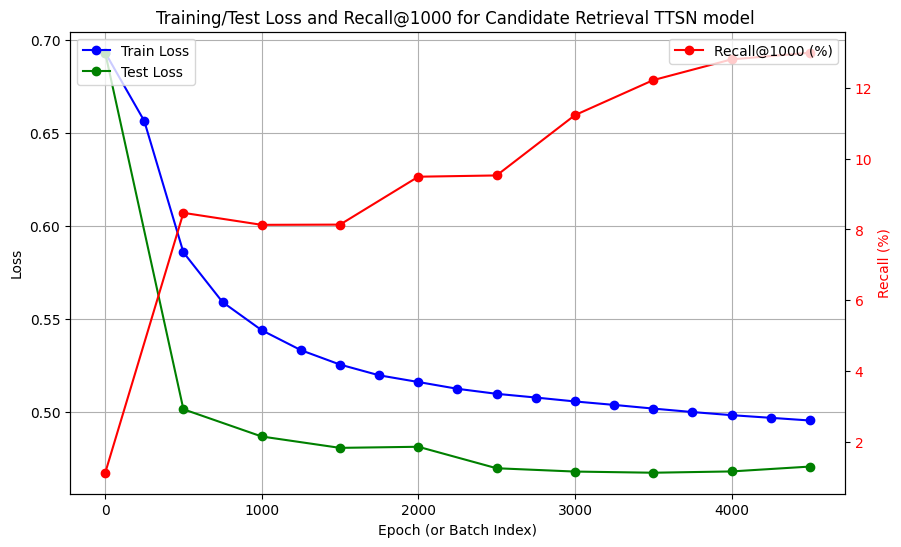

In [295]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual recorded data)
# Here, x_values could be batch indices or epoch numbers.

# Create the base plot for loss
fig, ax1 = plt.subplots(figsize=(10, 6))

train_batches, train_losses = zip(*train_loss)
test_batches, test_losses = zip(*test_loss)
recall_batches, recall_values = zip(*recalls)

ax1.plot(train_batches, train_losses, label='Train Loss', color='blue', marker='o')
ax1.plot(test_batches, test_losses, label='Test Loss', color='green', marker='o')
ax1.set_xlabel('Epoch (or Batch Index)')
ax1.set_ylabel('Loss', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for recall
ax2 = ax1.twinx()
# Multiply recall by 100 to show as percentage if desired.
ax2.plot(recall_batches, [r * 100.0 for r in recall_values], label='Recall@1000 (%)', color='red', marker='o')
ax2.set_ylabel('Recall (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Training/Test Loss and Recall@1000 for Candidate Retrieval TTSN model ')
plt.show()


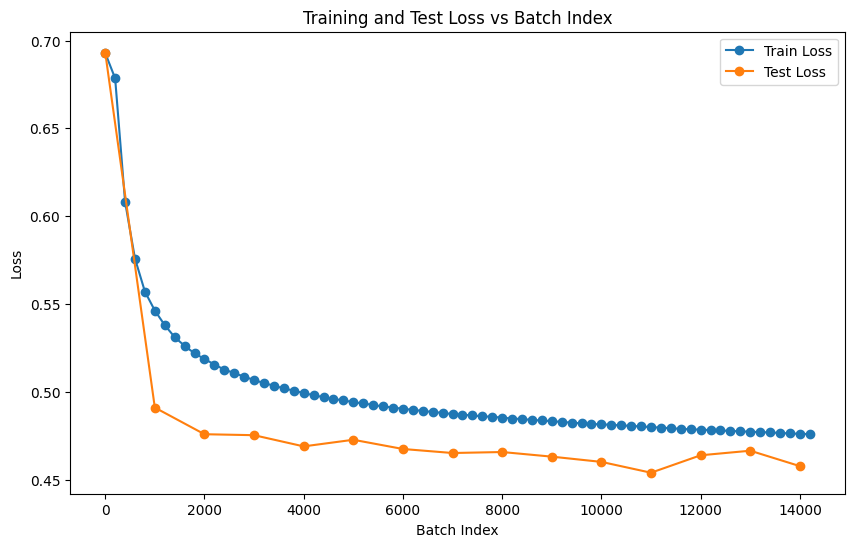

In [149]:
# Extract batch indices and losses for plotting
train_batches, train_losses = zip(*train_loss)
test_batches, test_losses = zip(*test_loss)

plt.figure(figsize=(10, 6))
plt.plot(train_batches, train_losses, label='Train Loss', marker='o')
plt.plot(test_batches, test_losses, label='Test Loss', marker='o')

plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.title('Training and Test Loss vs Batch Index')
plt.legend()
plt.show()

In [201]:
import torch

# Path to save the checkpoint
checkpoint_path = "./data/two_tower_checkpoint_3_Feb_A.pth"

# Save function
def save_checkpoint(model, optimizer, epoch, loss):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at epoch {epoch} with loss {loss:.4f}")

# Example usage (assuming you’re at epoch 5 with some loss value)
save_checkpoint(model, optimizer, epoch=1, loss=0.4759)


Checkpoint saved at epoch 1 with loss 0.4759


# Model Save/Load

In [18]:
import torch

# Load function
def load_checkpoint(model, optimizer, checkpoint_path):
    # Load the saved checkpoint
    checkpoint = torch.load(checkpoint_path)
    
    # Restore model and optimizer states
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    # Retrieve metadata from the checkpoint
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    
    print(f"Checkpoint loaded from epoch {epoch} with loss {loss:.4f}")
    return model, optimizer, epoch, loss

# Example usage
#model = TwoTowerRecommender(customer_input_dim=13, article_input_dim=544, embedding_dim=32)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# Load the checkpoint
model, optimizer, epoch, loss = load_checkpoint(model, optimizer, "./data/two_tower_checkpoint_3_Feb_A.pth")

# Set model to evaluation or training mode depending on the task
#model.eval()  # or model.train() if resuming training


Checkpoint loaded from epoch 20 with loss 0.5192


In [19]:
model

TwoTowerRecommender(
  (customer_tower): Sequential(
    (0): Linear(in_features=13, out_features=254, bias=True)
    (1): ReLU()
    (2): Linear(in_features=254, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=32, bias=True)
  )
  (article_tower): Sequential(
    (0): Linear(in_features=544, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=32, bias=True)
  )
)

# TTSN KNN inference

In [20]:
model

TwoTowerRecommender(
  (customer_tower): Sequential(
    (0): Linear(in_features=13, out_features=254, bias=True)
    (1): ReLU()
    (2): Linear(in_features=254, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=32, bias=True)
  )
  (article_tower): Sequential(
    (0): Linear(in_features=544, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=32, bias=True)
  )
)

In [260]:
test_data_7d_recall_sampled = test_data_7d_recall.sample(frac=0.02, random_state=42)
recall_customer_features = test_data_7d_recall_sampled.merge(customers_encoded, how="left", on="customer_id")
recall_customer_features_tensor = torch.tensor(customer_training_data_preparation(recall_customer_features[customers_encoded.columns]).values, dtype=torch.float32).to(device)
with torch.no_grad():
    # Pass the customer features through the customer tower.
    user_embeddings = model.customer_tower(recall_customer_features_tensor).cpu().numpy()

import numpy as np
user_norms = np.linalg.norm(user_embeddings, axis=1, keepdims=True)
user_embeddings_norm = user_embeddings / user_norms
user_ids = test_data_7d_recall_sampled.customer_id.values

article_features_tensor = torch.tensor(article_training_data_preparation(articles_categorical).values, dtype=torch.float32).to(device)

with torch.no_grad():
    # Pass the article features through the article tower.
    article_embeddings = model.article_tower(article_features_tensor).cpu().numpy()
    
# Optionally, normalize the embeddings for cosine similarity.
article_norms = np.linalg.norm(article_embeddings, axis=1, keepdims=True)
article_embeddings_norm = article_embeddings / article_norms
article_embeddings_norm

article_ids = articles_categorical.index.to_numpy()
article_ids

In [261]:
test_data_7d_recall_sampled

,customer_id,bought_articles
70921,fe166630e5e67ed3db27d66679c1cf2d4c90a10a9a42c4...,{863937003}
33346,7b9fb26a397db5be7bea2bd36423e8401da543c9c8c12c...,{572998009}
64878,e9881b8361917858b67a3543f20e0a1a728150e92539c0...,"{881112001, 903840002, 573085028, 790368006, 9..."
1213,047686dd8b581ccbd98c6f49aa40f07bad1eb5768782d0...,"{807241057, 912460001, 918725001, 807241001, 7..."
20458,4b9366a00114c9b5df506e3e8a62cabb512c9009350db0...,"{756898003, 857030004}"
...,...,...
39296,91d386c9f7497b0d30ad5f6a278600736af4f9b7a83d7f...,{685814001}
70077,fb1ddf4a453fbfd43854e71abcdd15b2ebfef4709c3cd0...,"{699080001, 804916001, 736923011}"
67663,f2fe7eb015a6ff68eade95ae7d1eb7f1f18741cf03f7b6...,{270381003}
36869,88ee51fed6c213029fbd2255a8ab5b5671194e3ef7c64b...,"{894668003, 834924005}"


In [262]:
recall_customer_features = test_data_7d_recall_sampled.merge(customers_encoded, how="left", on="customer_id")

In [263]:
recall_customer_features_tensor = torch.tensor(customer_training_data_preparation(recall_customer_features[customers_encoded.columns]).values, dtype=torch.float32).to(device)
recall_customer_features_tensor.shape

torch.Size([1429, 13])

In [265]:
with torch.no_grad():
    # Pass the customer features through the customer tower.
    user_embeddings = model.customer_tower(recall_customer_features_tensor).cpu().numpy()

import numpy as np
user_norms = np.linalg.norm(user_embeddings, axis=1, keepdims=True)
user_embeddings_norm = user_embeddings / user_norms
user_embeddings_norm

array([[ 0.16439067, -0.11085542, -0.21051921, ..., -0.14026514,
        -0.1697118 , -0.15989852],
       [ 0.15311469, -0.0793384 , -0.15406252, ..., -0.1744908 ,
        -0.1488602 , -0.19660106],
       [ 0.15309644, -0.0782056 , -0.15367815, ..., -0.17383543,
        -0.14923911, -0.19752917],
       ...,
       [ 0.15347952, -0.08052082, -0.15474558, ..., -0.17480843,
        -0.14833972, -0.19593874],
       [ 0.1648368 , -0.11169806, -0.21050678, ..., -0.13900577,
        -0.16843894, -0.15826668],
       [ 0.153215  , -0.07792622, -0.15360227, ..., -0.17350335,
        -0.14916146, -0.19789937]], shape=(1429, 32), dtype=float32)

In [266]:
user_ids = test_data_7d_recall_sampled.customer_id.values
user_ids.shape

(1429,)

In [253]:
article_features_tensor = torch.tensor(article_training_data_preparation(articles_categorical).values, dtype=torch.float32).to(device)

with torch.no_grad():
    # Pass the article features through the article tower.
    article_embeddings = model.article_tower(article_features_tensor).cpu().numpy()
    
# Optionally, normalize the embeddings for cosine similarity.
article_norms = np.linalg.norm(article_embeddings, axis=1, keepdims=True)
article_embeddings_norm = article_embeddings / article_norms
article_embeddings_norm

array([[ 0.14390376, -0.14015494, -0.22374333, ..., -0.21598653,
        -0.16159661, -0.20017523],
       [ 0.14390376, -0.14015494, -0.22374333, ..., -0.21598653,
        -0.16159661, -0.20017523],
       [-0.17500319,  0.08725829,  0.07353755, ...,  0.06053438,
         0.13185732,  0.08698127],
       ...,
       [-0.1632396 , -0.03450141,  0.0231229 , ...,  0.00942195,
         0.07457127,  0.08508432],
       [-0.16735847,  0.08500639,  0.09479965, ...,  0.11495481,
         0.13763565,  0.12227166],
       [-0.1632396 , -0.03450141,  0.0231229 , ...,  0.00942195,
         0.07457127,  0.08508432]], shape=(105542, 32), dtype=float32)

In [254]:
article_ids = articles_categorical.index.to_numpy()
article_ids

array([108775015, 108775044, 108775051, ..., 956217002, 957375001,
       959461001], shape=(105542,))

In [269]:
ks = [50, 100, 500, 1000, 5000, 10000, 20000]
ks_recalls = []
for k in ks:
    recalls = []
    for idx in range(user_ids.shape[0]):
        if idx % 100 == 0:
            print(idx)
        similarities = np.dot(user_embeddings_norm[idx], article_embeddings_norm.T)
        top_indices_unsorted = np.argpartition(-similarities, kth=k)[:k]
        top_articles_ids = set(article_ids[top_indices_unsorted])
    
        row = test_data_7d_recall_sampled[test_data_7d_recall_sampled['customer_id'] == user_ids[idx]]
        bought_articles = row.iloc[0]['bought_articles']
        num_relevant = len(top_articles_ids.intersection(bought_articles))
        recall = num_relevant / len(bought_articles)
        recalls.append(recall)
    print(k, np.mean(recalls))
    ks_recalls.append(np.mean(recalls))
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
50 0.009013174629813167
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
100 0.016994138926382782
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
500 0.08286322095113126
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1000 0.12725536892445488
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
5000 0.3610771810704702
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
10000 0.5189070490965504
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
20000 0.7145722720436847


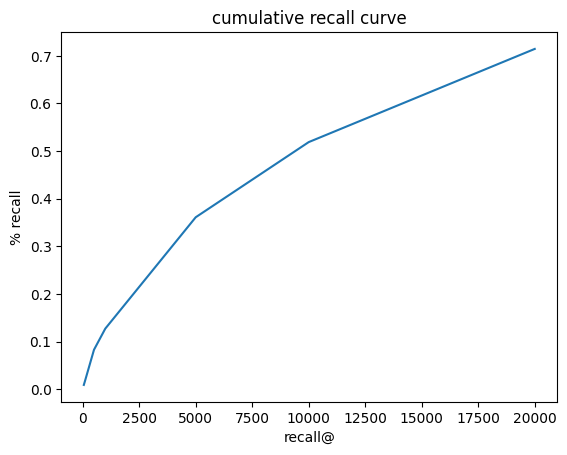

In [277]:
plt.plot(ks, ks_recalls)
plt.title("cumulative recall curve")
plt.xlabel("recall@")
plt.ylabel("% recall")
plt.show()


In [210]:
similarities = np.dot(user_embeddings_norm[0], article_embeddings_norm.T)
similarities

array([ 0.9655213 ,  0.9655213 , -0.88519377, ..., -0.7751029 ,
       -0.9514445 , -0.7751029 ], shape=(105542,), dtype=float32)

In [213]:
top_indices_unsorted = np.argpartition(-similarities, kth=100)[:100]
top_indices_unsorted

array([ 57663,  43695, 104697,  94674,  94525, 101368, 101367, 101366,
        84347,  43697,  43698, 100937, 104555, 101371,  11749,  44410,
        43700,  43701,  43702,  94929,  92135,  43703,  43704,  43705,
        43706,  43707,  43708,  43709,  57082,  43710,  57080,  20739,
        43711,  60507,  81226,  57079,  57075,  57073,  60506,  57071,
        57069,  57067,  57066,  57064,  51537,  51536, 104070,  59773,
        59774, 104946, 104947,  95792,  95791,  60763,  57645,  57647,
        57649,  95790,  57652,  57653,  57654,  57655,  95789,  57656,
        95788,  95787,  95786,  57657,  57660,  11450,  93077,  93076,
        57661,  57662,  57664, 101370,  61759,  12368,  96001,  96000,
        92157,  92156,  45807,  45809,  78102,  12783,   8051,  39238,
       104975,  69729,  12370, 103862,  96061,  64256,  61758,  33283,
       103864, 103863,  64253,  96064])

In [228]:
top_article_ids = article_ids[top_indices_unsorted]

In [236]:
top_article_ids

array([717490081, 677930023, 926164001, 863595006, 863002001, 896152003,
       896152002, 896152001, 815434001, 677930026, 677930027, 893059004,
       924250001, 896161002, 549477005, 679887001, 677930031, 677930037,
       677930060, 864668003, 852584001, 677930062, 677930064, 677930066,
       677930070, 677930072, 677930077, 677930078, 715624054, 677930085,
       715624052, 590178001, 677930086, 729620002, 804992017, 715624051,
       715624036, 715624033, 729620001, 715624012, 715624010, 715624005,
       715624004, 715624002, 699178003, 699178001, 918516001, 724906018,
       724906019, 929165001, 929165002, 867969008, 867969007, 730683050,
       717490010, 717490012, 717490017, 867969006, 717490057, 717490058,
       717490059, 717490060, 867969003, 717490064, 867969002, 867968006,
       867968002, 717490065, 717490075, 547780025, 856667005, 856667004,
       717490076, 717490079, 717490083, 896161001, 734140002, 552866001,
       868629002, 868629001, 852642002, 852642001, 

In [220]:
row = test_data_7d_recall_sampled[test_data_7d_recall_sampled['customer_id'] == user_ids[0]]
row
   

,customer_id,bought_articles
70921,fe166630e5e67ed3db27d66679c1cf2d4c90a10a9a42c4...,{863937003}


In [226]:
bought_articles = row.iloc[0]['bought_articles']
num_relevant = len(top_article_ids.intersection(bought_articles))
num_relevant

0

In [21]:
import pandas as pd
import os
os.listdir('./data')

['customers.csv',
 '.DS_Store',
 'two_tower_checkpoint_1_Feb_A.pth',
 'images',
 'articles.csv',
 'transactions_train.csv',
 'full_training_labels.csv',
 'sample_submission.csv']

In [22]:
submission = pd.read_csv("./data/sample_submission.csv")

In [23]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,True,False,True,False,True,False,False,False,True,False,False,False,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,True,False,True,False,True,False,False,False,True,False,False,False,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,True,False,True,False,True,False,False,False,True,False,False,False,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,True,False,True,False,True,False,False,False,True,False,False,False,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,False,True,False,True,True,False,False,False,False,True,False,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,True,False,True,False,True,False,False,False,True,False,False,False,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,True,False,True,False,True,False,False,False,True,False,False,False,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,False,True,False,True,True,False,False,False,False,True,False,False,0.21


In [24]:
articles_categorical

,product_type_no_-1,product_type_no_49,product_type_no_57,product_type_no_59,product_type_no_60,product_type_no_66,product_type_no_67,product_type_no_68,product_type_no_69,product_type_no_70,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108775044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108775051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110065001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
110065002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953450001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
953763001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
956217002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
submission_uniques = set(list(submission.customer_id))

In [26]:
with_features_uniques = set(list(customers_encoded.index))

In [27]:
intersect_user = set()
for u in submission_uniques:
    if u in with_features_uniques:
        intersect_user.add(u)
len(intersect_user), len(submission_uniques)
    

(1371980, 1371980)

In [184]:
model.eval()

# Choose device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

TwoTowerRecommender(
  (customer_tower): Sequential(
    (0): Linear(in_features=13, out_features=254, bias=True)
    (1): ReLU()
    (2): Linear(in_features=254, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=32, bias=True)
  )
  (article_tower): Sequential(
    (0): Linear(in_features=544, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=32, bias=True)
  )
)

In [29]:
customer_features_tensor = torch.tensor(customer_training_data_preparation(customers_encoded).values, dtype=torch.float32).to(device)

In [30]:
model.customer_tower

Sequential(
  (0): Linear(in_features=13, out_features=254, bias=True)
  (1): ReLU()
  (2): Linear(in_features=254, out_features=254, bias=True)
  (3): ReLU()
  (4): Linear(in_features=254, out_features=32, bias=True)
)

In [31]:
with torch.no_grad():
    # Pass the customer features through the customer tower.
    user_embeddings = model.customer_tower(customer_features_tensor).cpu().numpy()


In [32]:
user_embeddings

array([[-0.85064954,  0.31157956, -0.8300066 , ...,  0.2639706 ,
        -0.4330371 , -0.40653935],
       [-0.89938474,  0.3308437 , -0.8923209 , ...,  0.31257948,
        -0.48788214, -0.4512458 ],
       [-0.90183145,  0.33186796, -0.8954547 , ...,  0.31488574,
        -0.49053437, -0.45337144],
       ...,
       [-1.124307  ,  0.45182127, -0.9012944 , ..., -0.04307365,
        -0.5136422 , -0.3285176 ],
       [-1.1330011 ,  0.4547561 , -0.91250473, ..., -0.03712555,
        -0.52018505, -0.3339882 ],
       [-0.67588615,  0.24325137, -0.657035  , ...,  0.23697528,
        -0.32734242, -0.30164382]], shape=(1371980, 32), dtype=float32)

In [33]:
import numpy as np
user_norms = np.linalg.norm(user_embeddings, axis=1, keepdims=True)
user_embeddings_norm = user_embeddings / user_norms

In [34]:
user_embeddings_norm

array([[-0.3090014 ,  0.11318235, -0.30150276, ...,  0.09588824,
        -0.15730223, -0.14767683],
       [-0.2983572 ,  0.10975236, -0.29601386, ...,  0.10369349,
        -0.16184747, -0.14969394],
       [-0.2978915 ,  0.10962208, -0.29578513, ...,  0.10401254,
        -0.16203251, -0.14975691],
       ...,
       [-0.36317998,  0.14594986, -0.29114118, ..., -0.01391389,
        -0.16591959, -0.1061196 ],
       [-0.36146504,  0.14508232, -0.29111937, ..., -0.01184428,
        -0.16595635, -0.10655335],
       [-0.31034404,  0.11169279, -0.30168822, ...,  0.10881102,
        -0.15030456, -0.13850462]], shape=(1371980, 32), dtype=float32)

In [37]:
user_embeddings_norm.shape[1]

32

In [43]:
customer_ids = customers_encoded.index.to_numpy()

In [44]:
import numpy as np

# Assume these are your computed embeddings and user IDs:
# user_embeddings: shape (num_users, embedding_dim), dtype=float32
# user_ids: a NumPy array (or list) with the corresponding user IDs

# Save both arrays in a single compressed file.
np.savez("./data/customer_embeddings.npz", customer_ids=customer_ids, customer_embeddings=user_embeddings_norm)


In [35]:
article_features_tensor = torch.tensor(article_training_data_preparation(articles_categorical).values, dtype=torch.float32).to(device)

with torch.no_grad():
    # Pass the article features through the article tower.
    article_embeddings = model.article_tower(article_features_tensor).cpu().numpy()
    
# Optionally, normalize the embeddings for cosine similarity.
article_norms = np.linalg.norm(article_embeddings, axis=1, keepdims=True)
article_embeddings_norm = article_embeddings / article_norms

In [36]:
article_embeddings_norm

array([[-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.37447694,  0.26960835, -0.31746832, ...,  0.03273991,
        -0.0709398 , -0.10418003],
       ...,
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ],
       [-0.12732163,  0.1491909 , -0.1390557 , ..., -0.13230626,
         0.07885028,  0.04837248],
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ]], shape=(105542, 32), dtype=float32)

In [45]:
articles_categorical.index.to_numpy()

array([108775015, 108775044, 108775051, ..., 956217002, 957375001,
       959461001], shape=(105542,))

In [46]:
article_ids = articles_categorical.index.to_numpy()

In [47]:
np.savez("./data/article_embeddings.npz", article_ids=article_ids, article_embeddings=article_embeddings_norm)

In [35]:
np.dot(user_embeddings_norm[0], article_embeddings_norm.T)

array([ 0.9496318 ,  0.9496318 ,  0.83290476, ...,  0.3046106 ,
       -0.12626183,  0.3046106 ], shape=(105542,), dtype=float32)

In [36]:
similarities = np.dot(user_embeddings_norm[0], article_embeddings_norm.T)

In [37]:
np.argpartition(-similarities, kth=12)

array([ 95844,  61602,  95843, ...,     11, 105540,  52770],
      shape=(105542,))

In [38]:
articles_categorical.reset_index().iloc[95844].article_id

np.int64(868063004)

In [39]:
import faiss
import numpy as np
import pandas as pd

# Assume your user and article embeddings are already normalized
# user_embeddings_norm: (num_users, embedding_dim)
# article_embeddings_norm: (num_articles, embedding_dim)
# articles_categorical: original DataFrame indexed by article_id

# Reset the index to ensure article_id is accessible as a column
articles_categorical_reset = articles_categorical.reset_index()

# Prepare FAISS index
embedding_dim = article_embeddings_norm.shape[1]  # Should be 32 (or your embedding size)
index = faiss.IndexFlatIP(embedding_dim)  # Inner product index for cosine similarity
index.add(article_embeddings_norm.astype(np.float32))  # Add all article embeddings


In [40]:
article_embeddings_norm

array([[-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.36891812,  0.24483952, -0.29774725, ...,  0.04456037,
        -0.12046511, -0.13389552],
       [-0.37447694,  0.26960835, -0.31746832, ...,  0.03273991,
        -0.0709398 , -0.10418003],
       ...,
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ],
       [-0.12732163,  0.1491909 , -0.1390557 , ..., -0.13230626,
         0.07885028,  0.04837248],
       [-0.28365773,  0.26439938, -0.19779333, ..., -0.12383389,
        -0.02610125, -0.0189227 ]], shape=(105542, 32), dtype=float32)

In [43]:
user_embeddings_norm

array([[-0.3090014 ,  0.11318235, -0.30150276, ...,  0.09588824,
        -0.15730223, -0.14767683],
       [-0.2983572 ,  0.10975236, -0.29601386, ...,  0.10369349,
        -0.16184747, -0.14969394],
       [-0.2978915 ,  0.10962208, -0.29578513, ...,  0.10401254,
        -0.16203251, -0.14975691],
       ...,
       [-0.36317998,  0.14594986, -0.29114118, ..., -0.01391389,
        -0.16591959, -0.1061196 ],
       [-0.36146504,  0.14508232, -0.29111937, ..., -0.01184428,
        -0.16595635, -0.10655335],
       [-0.31034404,  0.11169279, -0.30168822, ...,  0.10881102,
        -0.15030456, -0.13850462]], shape=(1371980, 32), dtype=float32)

In [73]:
index

<faiss.swigfaiss.IndexFlatIP; proxy of <Swig Object of type 'faiss::IndexFlatIP *' at 0x31ba4eb50> >

In [71]:
pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:

# Top-k articles
k = 12

# Perform search for all user embeddings at once
distances, indices = index.search(user_embeddings_norm.astype(np.float32), k)

In [ ]:
import numpy as np
import faiss
import pandas as pd

# Assume these are already computed:
# - user_embeddings_norm: (num_users, embedding_dim) normalized user embeddings.
# - article_embeddings_norm: (num_articles, embedding_dim) normalized article embeddings.
# - customers_encoded: DataFrame whose index contains customer IDs in the same order as user_embeddings_norm.
# - articles_categorical: DataFrame indexed on article_id with article features.

# Reset articles_categorical index so that the article IDs become a column and rows are sequential.
articles_categorical_reset = articles_categorical.reset_index()
article_ids = articles_categorical_reset['article_id'].values

# Build the FAISS index
embedding_dim = article_embeddings_norm.shape[1]
index = faiss.IndexFlatIP(embedding_dim)  # Inner product index (works as cosine similarity if vectors are normalized)
index.add(article_embeddings_norm.astype(np.float32))

# Set the number of top articles to retrieve per user
k = 12

# Set a batch size (adjust based on available memory)
batch_size = 10000
num_users = user_embeddings_norm.shape[0]
num_batches = (num_users + batch_size - 1) // batch_size

# File to save recommendations
output_file = "recommendations_batches.csv"

# Write header to file
with open(output_file, 'w') as f:
    f.write("customer_id,recommended_articles\n")

# Process users in batches
for i in range(num_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, num_users)
    
    # Extract a batch of user embeddings
    batch_user_embeddings = user_embeddings_norm[start:end]
    
    # Perform the FAISS search for the batch (note: cast to float32)
    distances, indices = index.search(batch_user_embeddings.astype(np.float32), k)
    
    # Map indices back to actual article IDs
    recommended_article_ids = article_ids[indices]  # shape: (batch_size, k)
    
    # Get the corresponding customer IDs from customers_encoded (assumed to be in order)
    batch_customer_ids = customers_encoded.index.values[start:end]
    
    # Prepare the batch results
    batch_results = []
    for j, cust_id in enumerate(batch_customer_ids):
        # Convert the list of recommended article IDs into a comma-separated string
        recs_str = ",".join(map(str, recommended_article_ids[j].tolist()))
        batch_results.append([cust_id, recs_str])
    
    # Convert the batch results to a DataFrame and append to CSV
    df_batch = pd.DataFrame(batch_results, columns=["customer_id", "recommended_articles"])
    df_batch.to_csv(output_file, mode='a', index=False, header=False)
    
    print(f"Batch {i+1}/{num_batches} processed (users {start} to {end-1}).")

print(f"All batches processed. Recommendations saved to {output_file}")
